Q-1. Imagine you have a dataset where you have different Instagram features
like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.
Dataset This is the Dataset You can use this dataset for this question

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv('D:/ml_assignment_code/ml_assignment_code/data/instagram_reach.csv')
df_copy = df.copy()

In [4]:
df_copy

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [5]:
df_copy = df_copy.drop('Unnamed: 0',axis=1)

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   S.No               100 non-null    int64 
 1   USERNAME           100 non-null    object
 2   Caption            94 non-null     object
 3   Followers          100 non-null    int64 
 4   Hashtags           100 non-null    object
 5   Time since posted  100 non-null    object
 6   Likes              100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


In [7]:
df_copy.isnull().sum()

S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [8]:
df_copy.shape

(100, 7)

In [9]:
df_copy = df_copy.drop('S.No',axis=1)

In [10]:
df_copy['Time since posted'].unique

<bound method Series.unique of 0     11 hours
1      2 hours
2      2 hours
3      3 hours
4      3 hours
        ...   
95     3 hours
96     3 hours
97     3 hours
98     3 hours
99     3 hours
Name: Time since posted, Length: 100, dtype: object>

In [11]:
def temp_func(df_copy,col):
          for i in range(len(df_copy[col])):
                    if ' ' in df_copy[col][i]:
                              split_var = df_copy[col][i].split(' ')
                              df_copy[col][i] = split_var[0]
                    
          return df_copy
          
          
df_copy = temp_func(df_copy,'Time since posted')

C:\Users\Asus\AppData\Local\Temp\ipykernel_2616\2643086499.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[col][i] = split_var[0]


In [12]:
df_copy.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [13]:
df_copy.tail()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3,31
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3,42
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3,10
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3,222
99,palmariusdev,Obtén tu tienda en línea ahora.,741,#marketing #programming#development #desarroll...,3,109


In [14]:
df_copy['Caption'].fillna(df_copy['Caption'].mode(),inplace=True)

In [15]:
df_copy['Caption'].isnull().sum()

0

C:\Users\Asus\AppData\Local\Temp\ipykernel_2616\3594520956.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy["Followers"])


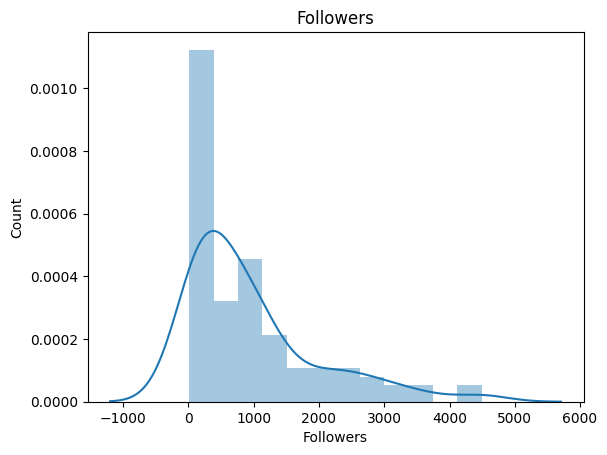

<Figure size 1500x1500 with 0 Axes>

In [16]:

sns.distplot(df_copy["Followers"])
plt.xlabel("Followers")
plt.ylabel("Count")
plt.title("Followers")
plt.figure(figsize=(15,15))
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_2616\1531884084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy["Likes"])


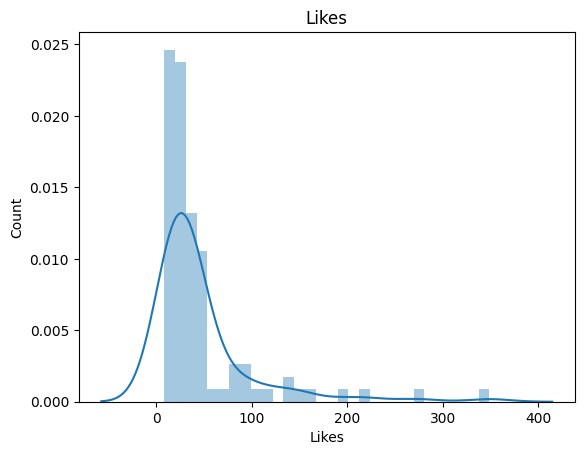

<Figure size 1500x1500 with 0 Axes>

In [17]:
sns.distplot(df_copy["Likes"])
plt.xlabel("Likes")
plt.ylabel("Count")
plt.title("Likes")
plt.figure(figsize=(15,15))
plt.show()

In [18]:
df_copy.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            100 non-null    object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [25]:
df_copy.duplicated().sum()

0

In [21]:
df_copy['Time since posted'] = df_copy['Time since posted'].astype(int)

In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            100 non-null    object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    int32 
 5   Likes              100 non-null    int64 
dtypes: int32(1), int64(2), object(3)
memory usage: 4.4+ KB


In [26]:
df_copy

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30
...,...,...,...,...,...,...
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3,31
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3,42
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3,10
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3,222


In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the "hashtags" column
df_copy['Hashtags'] = label_encoder.fit_transform(df_copy['Hashtags'])

In [24]:
df_copy['Caption'] = label_encoder.fit_transform(df_copy['Caption'])

In [25]:
df_copy['USERNAME'] = label_encoder.fit_transform(df_copy['USERNAME'])

In [26]:
numerical_feature = [feature for feature in df_copy.columns if df_copy[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df_copy[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df_copy.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 6
Discrete feature Count 1
Continuous feature Count 5
Categorical feature Count 0


C:\Users\Asus\AppData\Local\Temp\ipykernel_2616\3616225505.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy[feature])


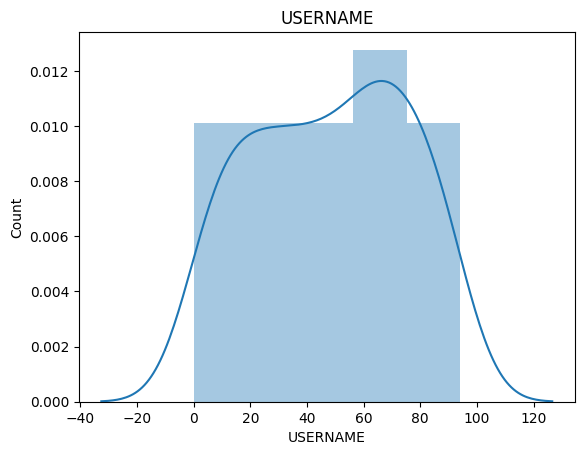

<Figure size 1500x1500 with 0 Axes>

C:\Users\Asus\AppData\Local\Temp\ipykernel_2616\3616225505.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy[feature])


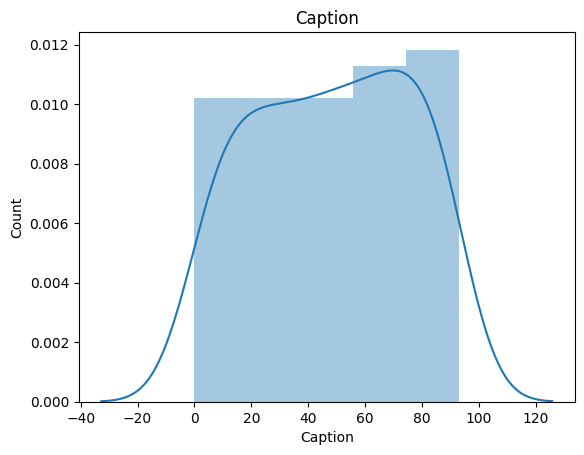

<Figure size 1500x1500 with 0 Axes>

C:\Users\Asus\AppData\Local\Temp\ipykernel_2616\3616225505.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy[feature])


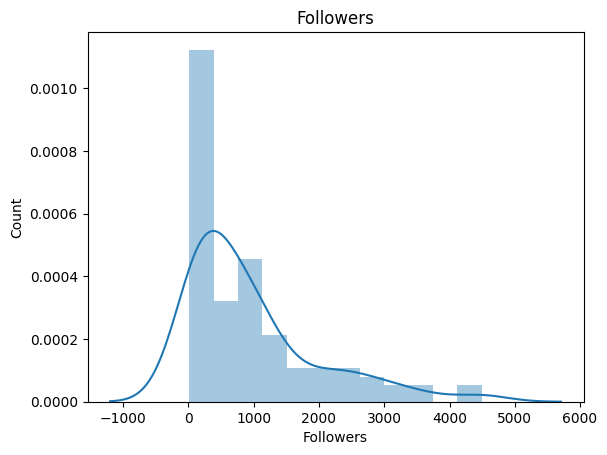

<Figure size 1500x1500 with 0 Axes>

C:\Users\Asus\AppData\Local\Temp\ipykernel_2616\3616225505.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy[feature])


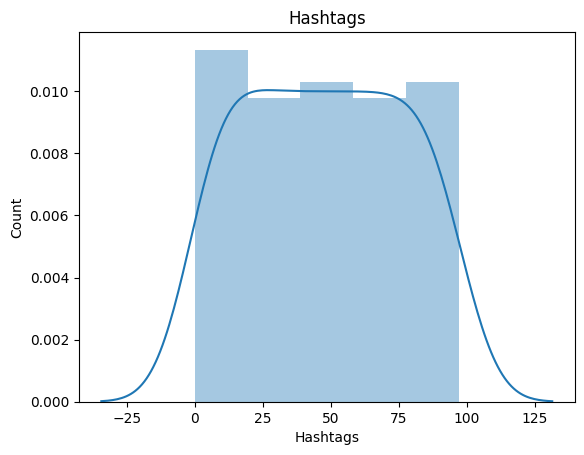

<Figure size 1500x1500 with 0 Axes>

C:\Users\Asus\AppData\Local\Temp\ipykernel_2616\3616225505.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy[feature])


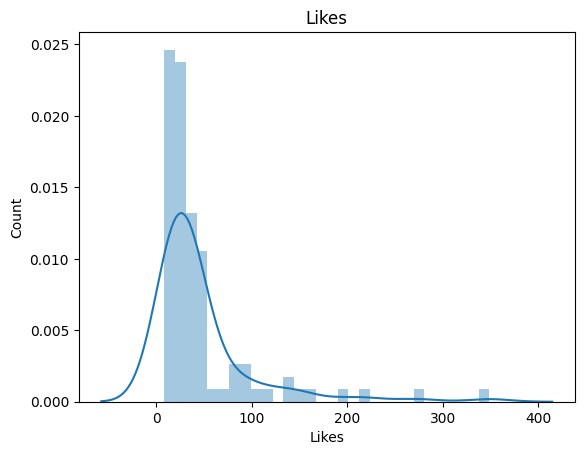

<Figure size 1500x1500 with 0 Axes>

In [27]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df_copy[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [172]:
X = df_copy.drop(labels=['Time since posted','Likes'],axis=1)
y = df_copy.loc[:,['Time since posted','Likes']]

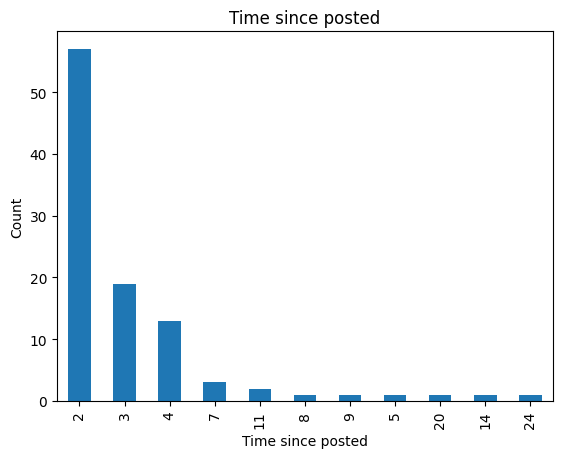

<Figure size 1500x1500 with 0 Axes>

In [28]:
df_copy['Time since posted'].value_counts().plot.bar()
plt.xlabel('Time since posted')
plt.ylabel("Count")
plt.title('Time since posted')
plt.figure(figsize=(15,15))
plt.show()

In [29]:
import statistics as st
from sklearn.feature_selection import VarianceThreshold

In [30]:
X = df_copy.drop(labels=['Time since posted','Likes'],axis=1)
y = df_copy.loc[:,['Time since posted','Likes']]

In [31]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [36]:
sum(var_thres.get_support())

4

In [32]:
constant_columns = [column for column in X.columns
                    if column not in X.columns[var_thres.get_support()]]

print(len(constant_columns))

0


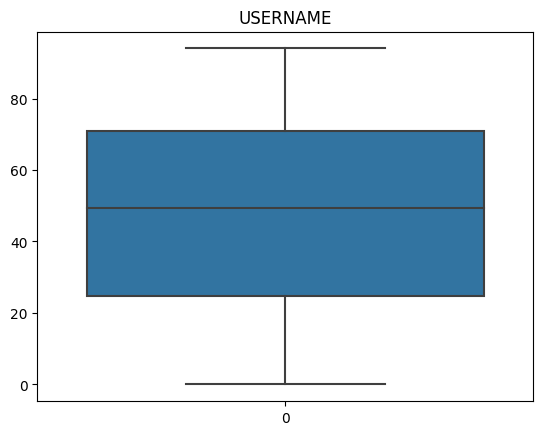

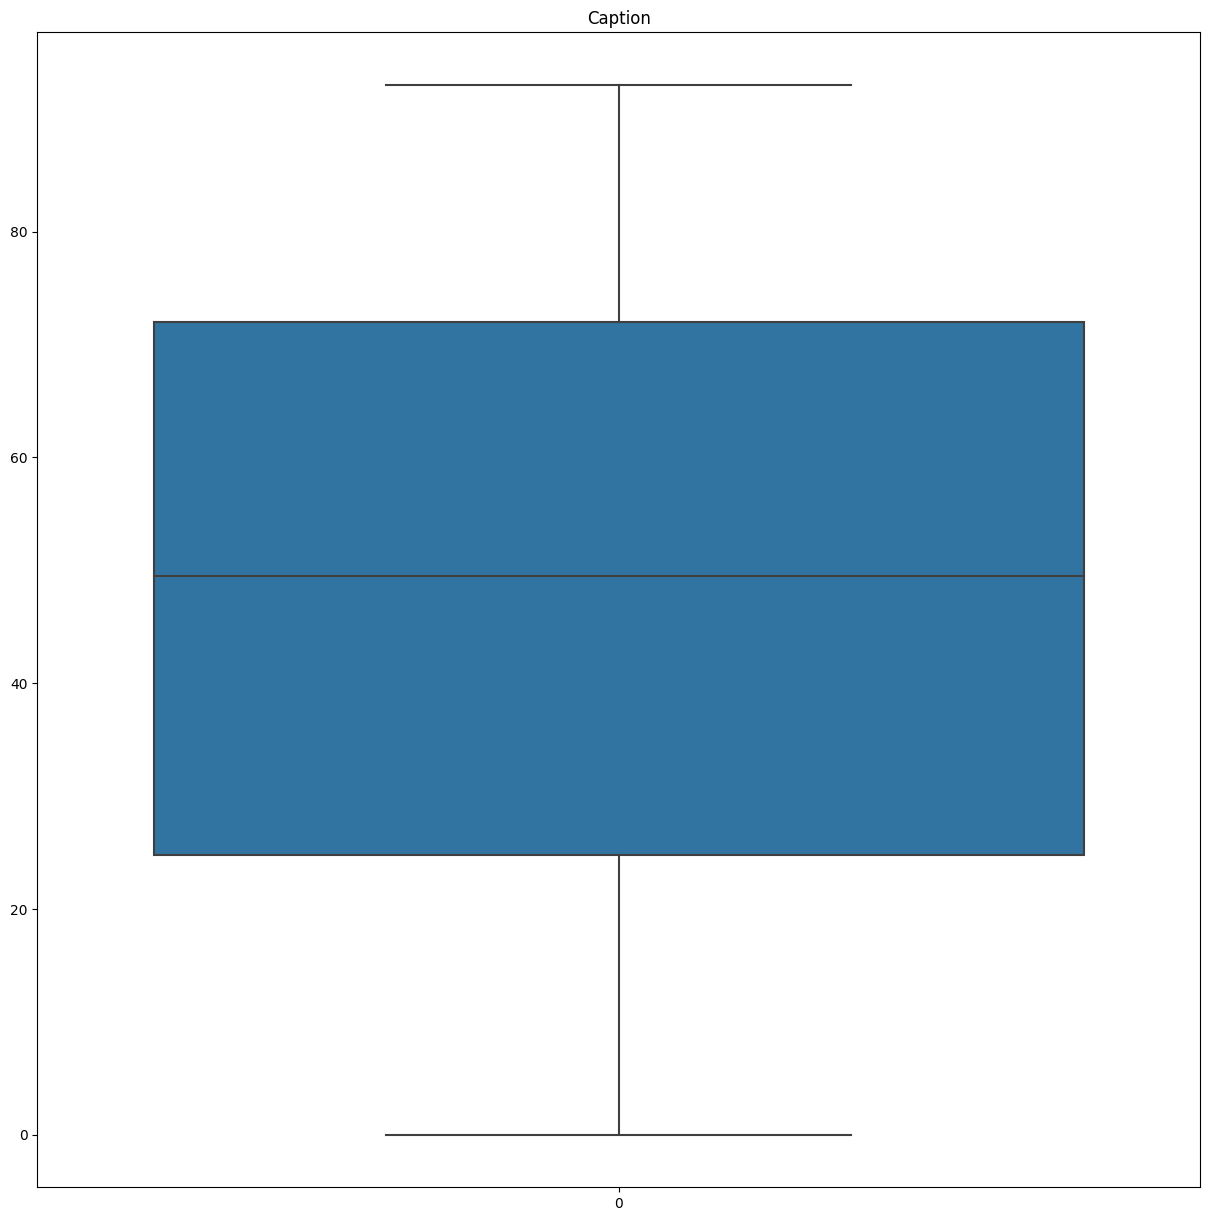

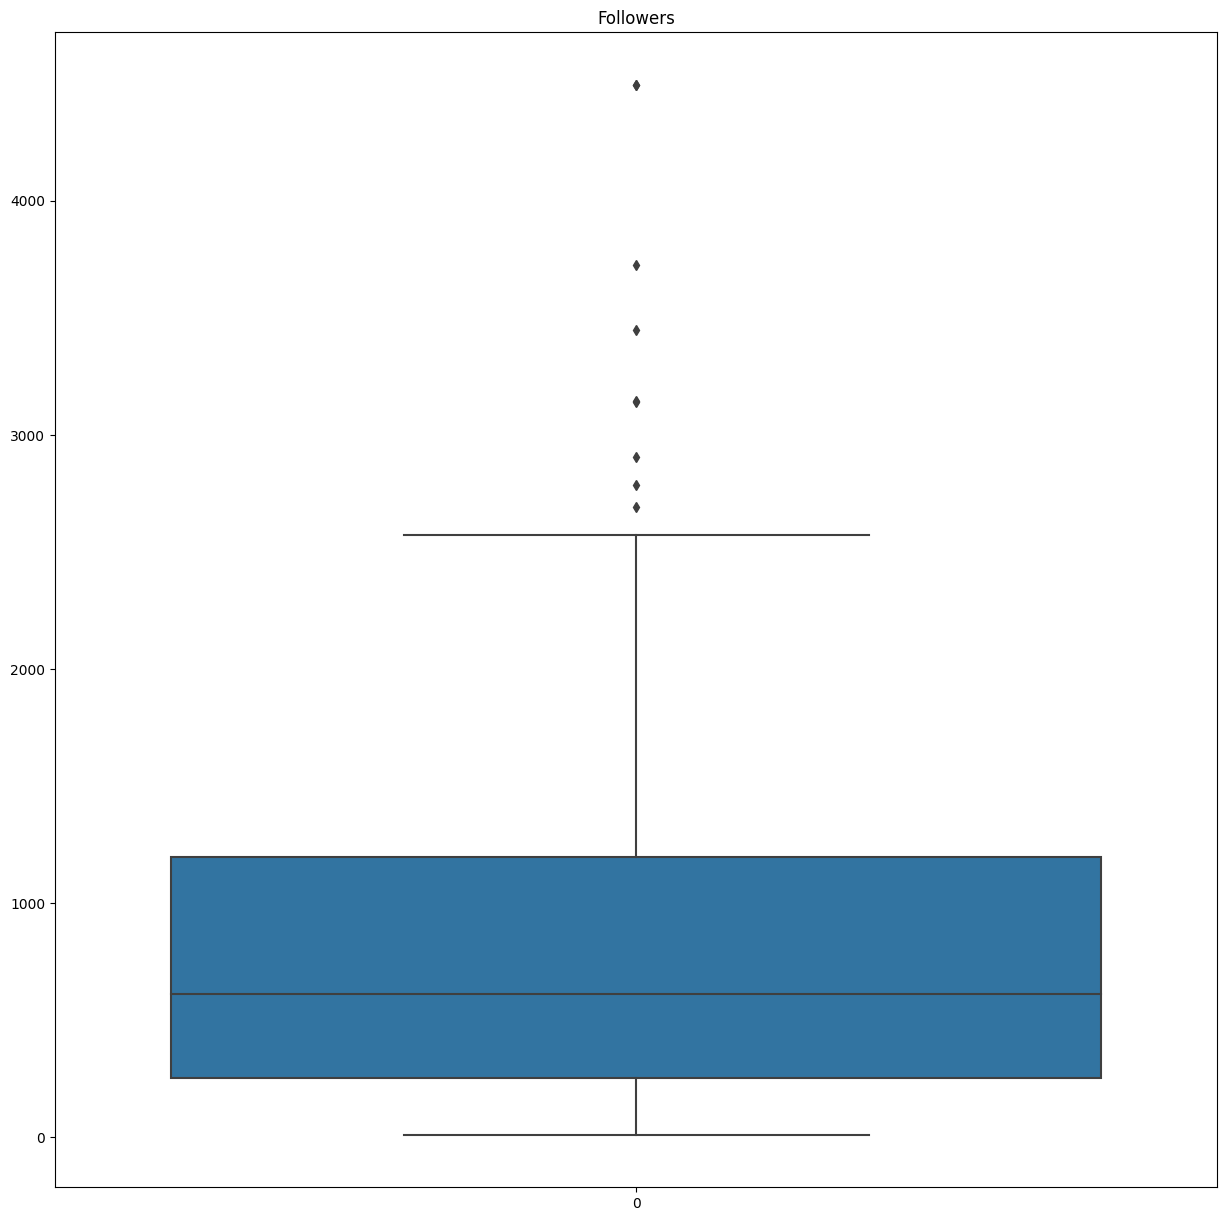

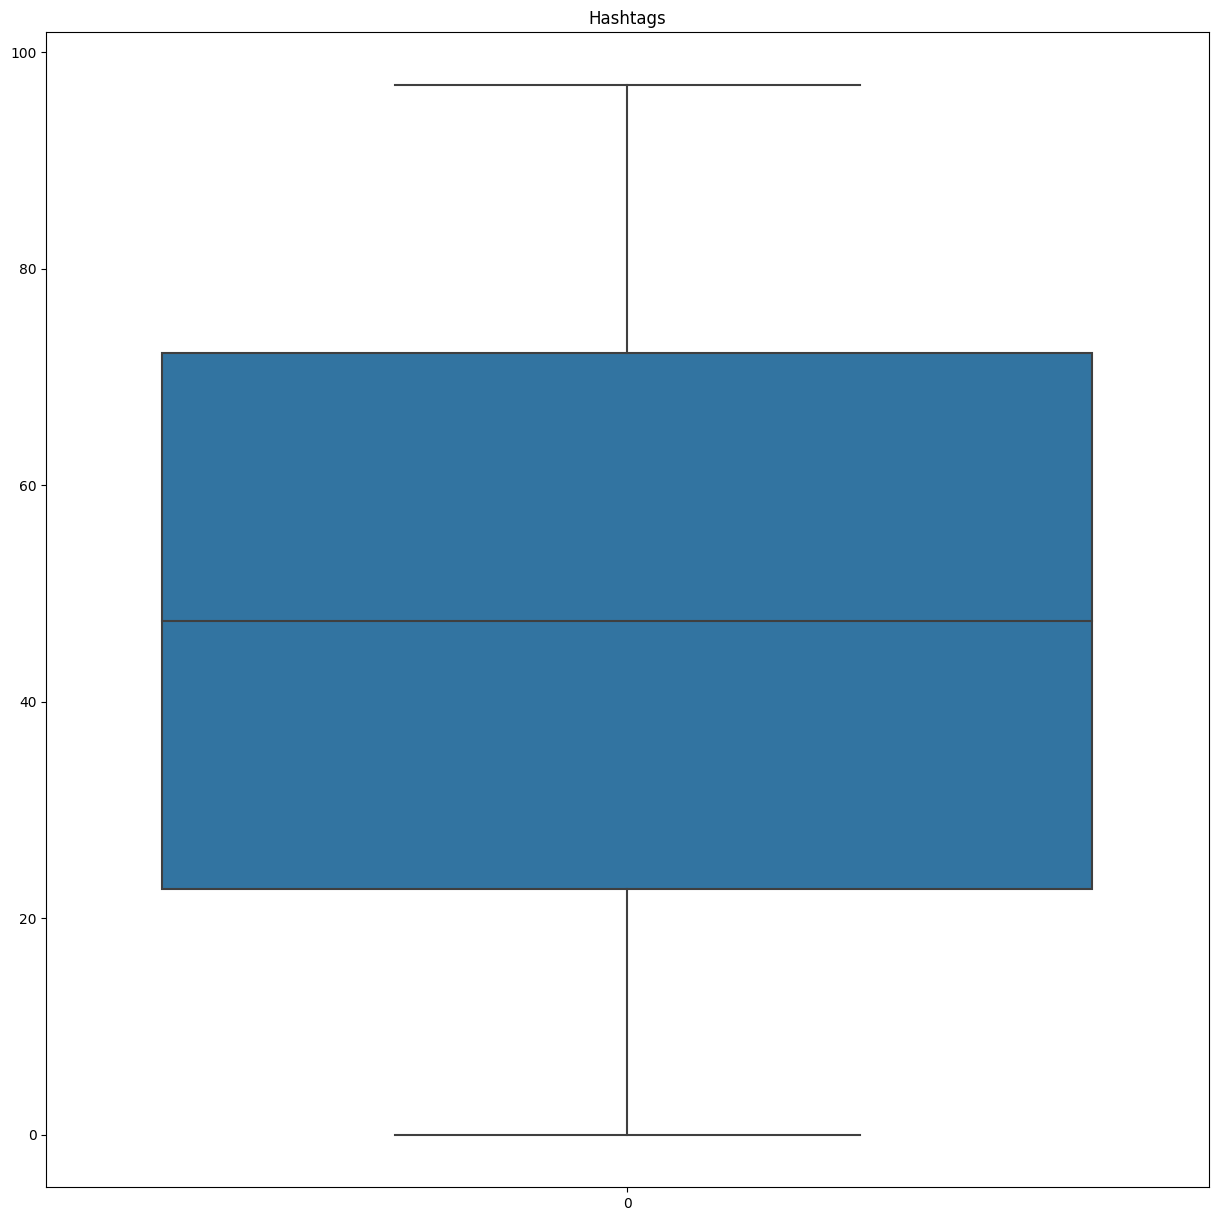

<Figure size 1500x1500 with 0 Axes>

In [33]:
for feature in X.columns:
    sns.boxplot(X[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [188]:
Followers = df_copy.groupby("Followers")["Likes"].mean().sort_values(ascending=False).reset_index()

<Axes: title={'center': 'Followers vs Likes'}, xlabel='Followers', ylabel='Likes'>

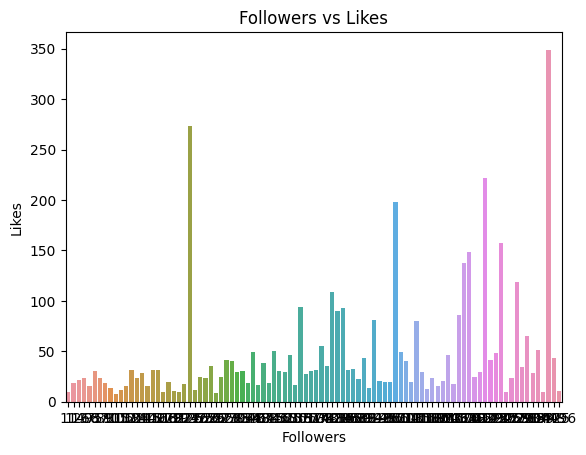

In [189]:
plt.title('Followers vs Likes')
sns.barplot(x='Followers',y='Likes',data=Followers)

In [39]:
Hashtags = df_copy.groupby("Hashtags")["Likes"].mean().sort_values(ascending=False).reset_index()

<Axes: title={'center': 'Hashtags vs Likes'}, xlabel='Hashtags', ylabel='Likes'>

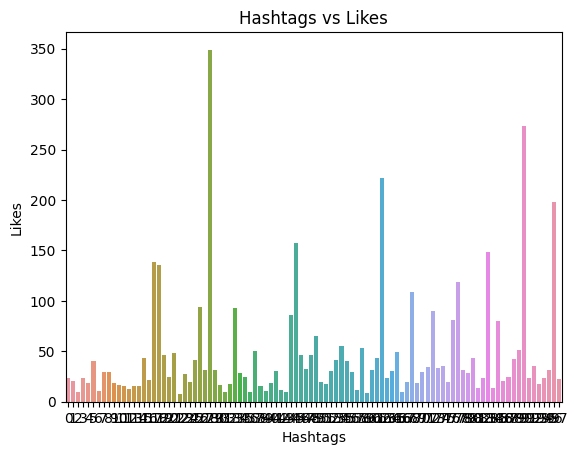

In [40]:
plt.title('Hashtags vs Likes')
sns.barplot(x='Hashtags',y='Likes',data=Hashtags)

In [41]:
Caption = df_copy.groupby("Caption")["Likes"].mean().sort_values(ascending=False).reset_index()

<Axes: title={'center': 'Caption vs Likes'}, xlabel='Caption', ylabel='Likes'>

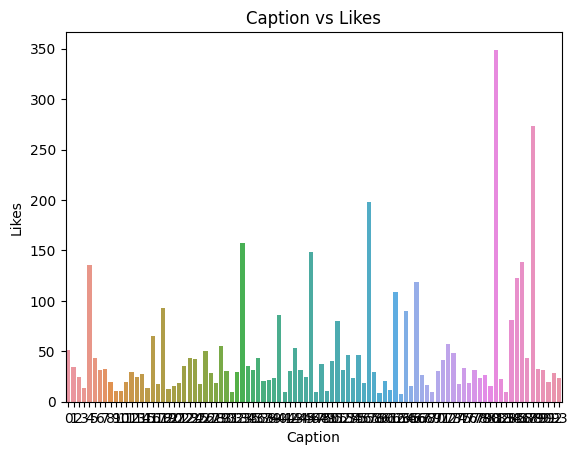

In [42]:
plt.title('Caption vs Likes')
sns.barplot(x='Caption',y='Likes',data=Caption)

In [43]:
df_copy.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

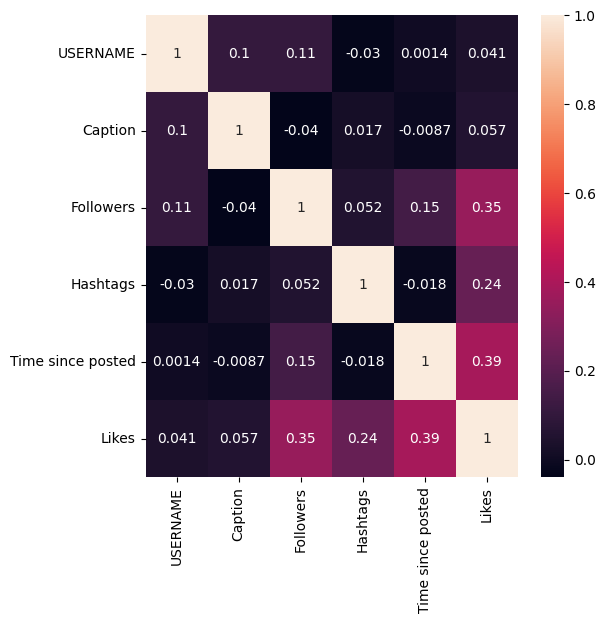

In [44]:
corrmat = df_copy.corr(method = "spearman")
plt.figure(figsize=(6,6))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [35]:
df = pd.read_csv('D:/ml_assignment_code/ml_assignment_code/data/instagram_reach.csv')
df_copy = df.copy()

In [97]:
df_copy.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [36]:
df_copy = df_copy.drop('Unnamed: 0',axis=1)

In [37]:
df_copy = df_copy.drop('S.No',axis=1)

In [38]:
def temp_func(df_copy,col):
          for i in range(len(df_copy[col])):
                    if ' ' in df_copy[col][i]:
                              split_var = df_copy[col][i].split(' ')
                              df_copy[col][i] = split_var[0]
                    
          return df_copy
          
          
df_copy = temp_func(df_copy,'Time since posted')

C:\Users\Asus\AppData\Local\Temp\ipykernel_2616\2643086499.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[col][i] = split_var[0]


In [39]:
X = df_copy.drop(labels=['Time since posted','Likes'],axis=1)
y = df_copy.loc[:,['Time since posted','Likes']]

In [40]:
X

,USERNAME,Caption,Followers,Hashtags
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...
...,...,...,...,...
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...


In [41]:
y

,Time since posted,Likes
0,11,139
1,2,23
2,2,25
3,3,49
4,3,30
...,...,...
95,3,31
96,3,42
97,3,10
98,3,222


In [42]:
import re
import string

def preprocess_text(text):
    if isinstance(text, float):
        return ""  # Return an empty string or handle it as per your requirement
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Apply any additional preprocessing steps as needed
    
    return text

In [43]:
X['Hashtags'] = X['Hashtags'].apply(preprocess_text)

In [44]:
X['Caption'] = X['Caption'].apply(preprocess_text)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(X['Caption'])
X['Caption'] = tfidf_matrix.toarray()

In [46]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(X['Hashtags'])
X['Hashtags'] = tfidf_matrix.toarray()

In [48]:
len(X['USERNAME'].unique())

95

In [49]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the "hashtags" column
X['USERNAME'] = label_encoder.fit_transform(X['USERNAME'])

In [50]:
X['Hashtags']

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
95    0.0
96    0.0
97    0.0
98    0.0
99    0.0
Name: Hashtags, Length: 100, dtype: float64

In [53]:
X['Hashtags'].unique()

array([0.        , 0.24027892])

In [51]:
X['Caption'] 

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.143261
        ...   
95    0.000000
96    0.000000
97    0.000000
98    0.000000
99    0.000000
Name: Caption, Length: 100, dtype: float64

In [55]:
X['USERNAME'] 

0     64
1     29
2      3
3     71
4     23
      ..
95    63
96    30
97    31
98    55
99    73
Name: USERNAME, Length: 100, dtype: int32

In [56]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [58]:
numerical_columns = X.columns[X.dtypes!='object']
categorical_columns = X.columns[X.dtypes=='object']

In [116]:
numerical_columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags'], dtype='object')

In [59]:
categorical_columns

Index([], dtype='object')

In [60]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=30)

In [61]:
X_train.shape

(80, 4)

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 93 to 37
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   USERNAME   80 non-null     int32  
 1   Caption    80 non-null     float64
 2   Followers  80 non-null     int64  
 3   Hashtags   80 non-null     float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 2.8 KB


In [63]:
X_test.shape

(20, 4)

In [58]:
y_train.shape

(80, 2)

In [59]:
y_test.shape

(20, 2)

In [60]:
X_train.shape

(80, 4)

In [65]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler(with_mean=False))
    ]
)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,X.columns)
])

In [66]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [67]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [68]:
import numpy as np
def evaluate_model(true, predicted,X_train,y_train):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    n = len(y_train)
    k = len(X_train.columns)
    adjusted_r2_score = 1 - ((1 - r2_square) * (n - 1) / (n - k - 1))
    return mae, rmse, r2_square,adjusted_r2_score

In [69]:
## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    "RandomForestRegressor":RandomForestRegressor(random_state=3)
}
trained_model_list=[]
model_list=[]
r2_list=[]
y_pred_list = []

print(len(list(models)),'len(list(models)')
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square,adjusted_r2_score=evaluate_model(y_test,y_pred,X_train,y_train)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    # print(model_list,'model_list')

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)
    print("Adjusted R2 score",adjusted_r2_score*100)

    r2_list.append(r2_square)
    y_pred_list.append(y_pred)
    
    print('='*35)
    print('\n')


5 len(list(models)
LinearRegression
Model Training Performance
RMSE: 48.93727472802686
MAE: 19.085950308042406
R2 score -6.965605197954206
Adjusted R2 score -12.670437475178442


Lasso
Model Training Performance
RMSE: 48.6984062615384
MAE: 19.04929300031823
R2 score -5.58947759889058
Adjusted R2 score -11.220916404164761


Ridge
Model Training Performance
RMSE: 48.905039643
MAE: 19.08309749743409
R2 score -6.798981971554763
Adjusted R2 score -12.494927676704371


Elasticnet
Model Training Performance
RMSE: 48.16894037891233
MAE: 19.192527500086076
R2 score -3.215177937877045
Adjusted R2 score -8.719987427897147


RandomForestRegressor
Model Training Performance
RMSE: 57.6207564778816
MAE: 23.473333333333333
R2 score -72.40183797571436
Adjusted R2 score -81.59660266775246


